### Import required packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Get Data

In [4]:
# Datasets
training_dataset = pd.read_csv('train.csv')
testing_dataset = pd.read_csv('test.csv')

In [5]:
titanic_data_description = pd.DataFrame({'Column Name':['PassengerId','Survived','Pclass','Name',
'Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], 'Description':['Passenger Identity','Whether a passenger survived or not','Class of ticket, a proxy for socio-economic status(SES)',
'Name of passenger','Sex of passenger','Age of passenger in years','Number of sibling and/or spouse travelling with passenger',
'Number of parents and/or children travelling with passenger','Ticket number','Price of ticket','Cabin number','Port of embarkation'],'Key':['',"0 = No, 1 = Yes","1=1st, 2=2nd, 3=3rd",'','','','','','','','',"C=Cherbourg,Q=Queenstown,S=Southampton"]})
titanic_data_description.set_index('Column Name', inplace=True)

**Notes**  
**sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored).  
**parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
# For changing the dislayed column width for the whole notebook
#pd.set_option('display.max_colwidth', None)
#pd.options.display.max_colwidth=None
#titanic_data_description

In [7]:
#pd.reset_option('^display') #for resetting all display options at once

In [8]:
# changing the column width displayed for this cell only
with pd.option_context('display.max_colwidth', None):
    display(titanic_data_description)

,Description,Key
Column Name,,
PassengerId,Passenger Identity,
Survived,Whether a passenger survived or not,"0 = No, 1 = Yes"
Pclass,"Class of ticket, a proxy for socio-economic status(SES)","1=1st, 2=2nd, 3=3rd"
Name,Name of passenger,
Sex,Sex of passenger,
Age,Age of passenger in years,
SibSp,Number of sibling and/or spouse travelling with passenger,
Parch,Number of parents and/or children travelling with passenger,
Ticket,Ticket number,


### Exploratory Data Analysis(EDA)

In [9]:
# Get information about the dataset
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset has 2 float features, 5 features of int datatype and 5 features of categorical datatype.  
It occupies 83.7 kilobytes in memory.

In [10]:
print(f'The dataset has {training_dataset.shape[0]} records with {training_dataset.shape[1]} features')

The dataset has 891 records with 12 features


In [11]:
# Statistical summary of the dataset
training_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [12]:
# Exploring missing values
total = training_dataset.isnull().sum()
percent = (round((total/training_dataset.isnull().count())*100, 1)).sort_values(ascending=False)
missing_data_distribution = pd.concat([total,percent], axis=1, keys=['Total','Percentage'])

In [13]:
missing_data_distribution.sort_values(by='Percentage', ascending=False)

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The **Embarked** column has 2 missing values which can be replaced or dropped.  
The **Cabin** column has 77% values missing so it could potentially be dropped.  
The **Age** column has almost 20% missing values and considering it's importance in the prediction they will have to be replaced.

**Q1** How does *survival rate* related with the other features of the dataset

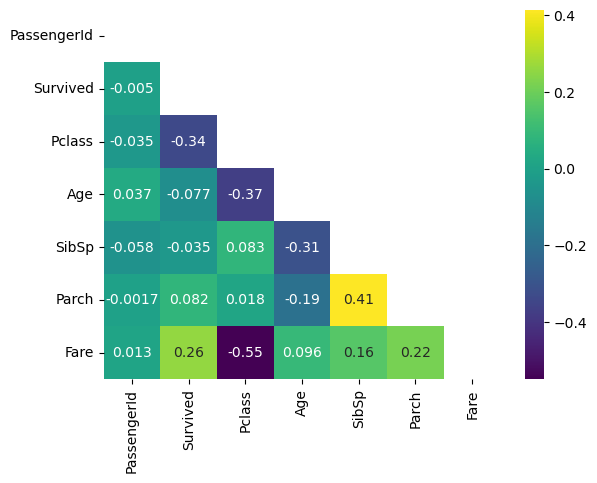

In [15]:
mask = np.triu(np.ones_like(training_dataset.corr(), dtype=bool)) # generate mask for upper triangle, np.tril() would mask lower triangle. np.ones_like change all the isolated values into one.
sns.heatmap(training_dataset.corr(), cmap='viridis', annot=True, mask=mask);

*survival rate* is inversely correlated with *Pclass*, *Fare*

**Q2** How gender influenced survival rate.

In [16]:
female_survived = training_dataset.groupby(['Sex', 'Survived'])['Survived'].count()[1]
total_number_female = training_dataset[training_dataset.Sex=='female']['Sex'].count()
print(f'Percentage of women who survived:{round(female_survived/total_number_female, 4):%}')


Percentage of women who survived:74.200000%


In [17]:
male_survived = training_dataset.groupby(['Sex', 'Survived'])['Survived'].count()[3]
total_number_male = training_dataset[training_dataset.Sex=='male']['Sex'].count()
print(f'Percentage of men who survived:{round(male_survived/total_number_male, 4):%}')

Percentage of men who survived:18.890000%


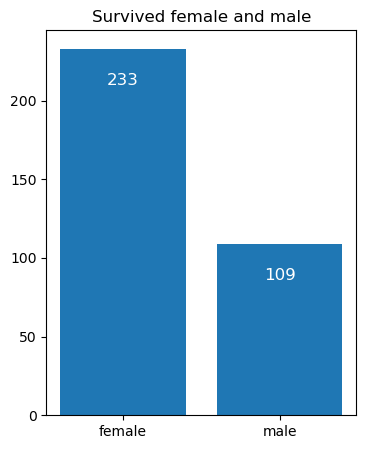

In [18]:
survived_sex = training_dataset.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.show()

**Q3** How did Pclass affect survival rate

In [19]:
survived_class = list(training_dataset.groupby('Pclass')['Survived'].sum())
survived_class_count = list(training_dataset.groupby('Pclass')['Survived'].count())
for i in range(len(survived_class_count)):
    print(f'Percentage of survivors in {i+1} class: {survived_class[i]/survived_class_count[i]:%}')

Percentage of survivors in 1 class: 62.962963%
Percentage of survivors in 2 class: 47.282609%
Percentage of survivors in 3 class: 24.236253%


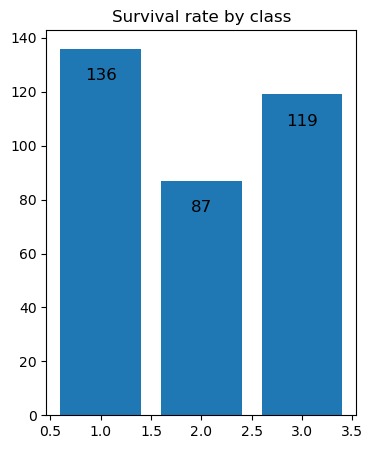

In [20]:
survived_class = training_dataset.groupby('Pclass')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_class.index, survived_class.values)
plt.title('Survival rate by class')
for i, value in enumerate(survived_class.values):
    plt.text(i+1, value-10, str(value), fontsize=12, color='black',horizontalalignment='center', verticalalignment='center')
plt.show()

**Q4** Fare, Cabin(First letter is the deck: A, B, C-1st class, D, E - mixed and F, G -3rd class). Get survival per cabin

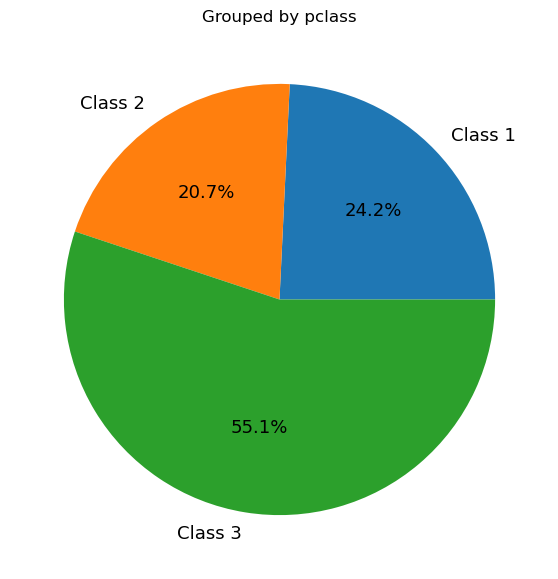

In [21]:
pclass_count = training_dataset.groupby('Pclass')['Pclass'].count()
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [22]:
# Dropping categorical variables
#drop_X_train = train_features.select_dtypes(exclude=['object'])

In [23]:
# Categorical Variables
#train_features.columns[train_features.dtypes=='object']